In [1]:
import pandas as pd
data=pd.read_csv('heart_dataset.csv')

In [2]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Check for duplicate rows
data["is_duplicate"]= data.duplicated()

print(f"#total= {len(data)}")
print(f"#duplicated= {len(data[data['is_duplicate']==True])}")


#total= 918
#duplicated= 0


In [4]:
data=data.drop('is_duplicate',axis=1)

In [5]:
# Check for missing values
data.isnull().any()


Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [6]:
data_columns=list(data.columns)

for column in data_columns:
  print(data[column].unique())

[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 192 193 308 219 257 132 22

We don't have any '?'s, we can one hot encode now

In [7]:
# pandas get_dummies function is the one-hot-encoder
def encode_onehot(_df, _f):
    _df2 = pd.get_dummies(_df[_f], prefix=_f, prefix_sep=' - ', dtype=int)
    _df3 = pd.concat([_df, _df2], axis=1)
    _df3 = _df3.drop([_f], axis=1)
    return _df3

# Print nominal variables
data_objects=[]
for f in list(data.columns.values):
    if data[f].dtype == object:
        print(f)
        data_objects.append(f)

Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope


In [8]:
len(data.columns)

12

In [9]:
for column in data_objects:
  data=encode_onehot(data,column)

data.head()
print(len(data.columns))

21


In [10]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex - F,Sex - M,ChestPainType - ASY,...,ChestPainType - NAP,ChestPainType - TA,RestingECG - LVH,RestingECG - Normal,RestingECG - ST,ExerciseAngina - N,ExerciseAngina - Y,ST_Slope - Down,ST_Slope - Flat,ST_Slope - Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [11]:
data.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex - F', 'Sex - M', 'ChestPainType - ASY',
       'ChestPainType - ATA', 'ChestPainType - NAP', 'ChestPainType - TA',
       'RestingECG - LVH', 'RestingECG - Normal', 'RestingECG - ST',
       'ExerciseAngina - N', 'ExerciseAngina - Y', 'ST_Slope - Down',
       'ST_Slope - Flat', 'ST_Slope - Up'],
      dtype='object')

In [12]:
# Sanity Check
for f in list(data.columns.values):
    if data[f].dtype == object:
        print(f)

In [13]:
# We need 4 classifiers
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
# 10-fold CV evaluation of a classifier
def eval_classifier_accuracy(classifier, X, y):
    accuracies = []
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X, y):
        classifier.fit(X[train_index], y[train_index])
        y_pred = classifier.predict(X[test_index])
        accuracies += [accuracy_score(y[test_index], y_pred)]
    return np.array(accuracies)

In [14]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex - F,Sex - M,ChestPainType - ASY,...,ChestPainType - NAP,ChestPainType - TA,RestingECG - LVH,RestingECG - Normal,RestingECG - ST,ExerciseAngina - N,ExerciseAngina - Y,ST_Slope - Down,ST_Slope - Flat,ST_Slope - Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [15]:
len(data.columns)

21

In [16]:
data['HeartDisease']

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [17]:
# Prepare the input X and y
X = np.array(data.loc[:, data.columns != 'HeartDisease'])
y = np.array(data.loc[:, data.columns == 'HeartDisease'].values.ravel())

# Sanity Check
print(X.shape)
print(len(y))


(918, 20)
918


In [18]:
from sklearn.tree import DecisionTreeClassifier
accurracies_dt=eval_classifier_accuracy(DecisionTreeClassifier(),X,y)

print(f'Decision Tree CV accuracy={np.mean(accurracies_dt)} STD={np.std(accurracies_dt)}')


Decision Tree CV accuracy=0.7952221691352126 STD=0.03145359859037946


In [19]:
from sklearn.neural_network import MLPClassifier
accurracies_NN=eval_classifier_accuracy(MLPClassifier(hidden_layer_sizes=(50,100),max_iter=500),X,y)

print(f'Neural Network CV accuracy={np.mean(accurracies_NN)} STD={np.std(accurracies_NN)}')


Neural Network CV accuracy=0.8225155279503106 STD=0.05379656286964799


In [20]:
from sklearn.svm import SVC
accurracies_svm=eval_classifier_accuracy(SVC(kernel='linear', probability=True),X,y)

print(f'SVM Linear CV accuracy={np.mean(accurracies_svm)} STD={np.std(accurracies_svm)}')


SVM Linear CV accuracy=0.8627448638318205 STD=0.02935118029423661


In [21]:
from sklearn.naive_bayes import GaussianNB
accurracies_NB=eval_classifier_accuracy(GaussianNB(),X,y)

print(f'Naive Bayes Linear CV accuracy={np.mean(accurracies_NB)} STD={np.std(accurracies_NB)}')


Naive Bayes Linear CV accuracy=0.8583373148590541 STD=0.03375994800987088


In [22]:
from sklearn.ensemble import RandomForestClassifier
accurracies_RF=eval_classifier_accuracy(RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0),X,y)

print(f'Random Forest CV accuracy={np.mean(accurracies_RF)} STD={np.std(accurracies_RF)}')


Random Forest CV accuracy=0.8758480649784998 STD=0.03909948185611957


Question 2:

In [23]:
# Main Priors Computed
counts = np.unique(y, return_counts=True)
NBpriors = [counts[1][0]/len(y), counts[1][1]/len(y)]

print(NBpriors)

[0.4466230936819172, 0.5533769063180828]


In [24]:
dt_ensembles=[]
nn_ensembles=[]
nb_ensembles=[]
svc_ensembles=[]
for i in range(100):
  dt=DecisionTreeClassifier(max_depth=5,max_features=5)
  svc=SVC(kernel='linear', probability=True)
  nb=GaussianNB(priors=NBpriors)
  nn=MLPClassifier(hidden_layer_sizes=(3,3),max_iter=30,tol=1e-1)

  dt_ensembles.append(dt)
  nn_ensembles.append(nn)
  nb_ensembles.append(nb)
  svc_ensembles.append(svc)


print(len(dt_ensembles))
print(len(nn_ensembles))
print(len(nb_ensembles))
print(len(svc_ensembles))




100
100
100
100


In [25]:
# We need 4 classifiers
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 10-fold CV evaluation of a classifier
def eval_single_acc(classifier, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

In [26]:

accuracydt=eval_single_acc(dt_ensembles[0],X,y)

print(f'Decision Tree accuracy={accuracydt}')


Decision Tree accuracy=0.8206521739130435


In [27]:

accuracynb=eval_single_acc(nb_ensembles[0],X,y)

print(f'Naive Bayes accuracy={accuracynb}')




Naive Bayes accuracy=0.8695652173913043


In [28]:

accuracynn=eval_single_acc(nn_ensembles[0],X,y)

print(f'Neural Network accuracy={accuracynn}')


Neural Network accuracy=0.6521739130434783


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:

accuracysvc=eval_single_acc(svc_ensembles[0],X,y)

print(f'Support Vector Classifier accuracy={accuracysvc}')


Support Vector Classifier accuracy=0.8532608695652174


Question 3: Write function ensemble_fit() to receive ensemble. (One of the 4 lists) as an input and train it on one of the subsets of the training data. Use random.sample. This way, each classifier will see only a differnet subset of the training dataset, also called as subsampling the input data for training. Use all features in these subssamples; only subsample the rows/observations

In [30]:
# Each classifier such see only a different subset of the training dataset
import random
def ensemble_fit(ensemble_list,k_samples,X,y):
  ensemble_models=[]
  random.seed(42)
  subs=[]
  for i in range(len(ensemble_list)):

    subsample_indices=random.sample(range(len(X)),k_samples)
    subs.append(subsample_indices)
    X_train=[X[j] for j in subsample_indices]
    y_train=[y[j] for j in subsample_indices]

    model=ensemble_list[i].fit(X_train,y_train)
    ensemble_models.append(model)
  return ensemble_models


ensemble_nb=ensemble_fit(nb_ensembles,50,X,y)
print(ensemble_nb[0])
print(len(ensemble_nb))




GaussianNB(priors=[0.4466230936819172, 0.5533769063180828])
100


Question 4: Write a funciton ensemble_predict() to receive the trained ensemble as input and output a prediction for a given observation. Since each subclassifier will have its own prediction, use a voting scheme on the returned predictions.

In [31]:
def ensemble_predict(trained_models,X_observation,y_observation):
  y_preds=[]
  for i in range(len(trained_models)):
    y_pred=trained_models[i].predict(X_observation)
    y_preds.append(y_pred)

  y_preds=np.array(y_preds)
  # Voting System done through majority
  aggregate_y_preds=[]

  for j in range(y_preds.shape[1]):
    unique,counts=np.unique(y_preds[:,j],return_counts=True)
    max_index = np.argmax(counts)
    agg_y_pred=unique[np.argmax(counts)]
    aggregate_y_preds.append(agg_y_pred)

  return aggregate_y_preds


y_pred=ensemble_predict(ensemble_nb,X[366:378],y[366:378])

In [32]:
ensemble_dt=ensemble_fit(dt_ensembles,int(0.2*len(X)),X,y)
y_pred_dt=ensemble_predict(ensemble_dt,X[366:378],y[366:378])
print('Decision Tree Predictions',y_pred_dt)

ensemble_nb=ensemble_fit(nb_ensembles,int(0.2*len(X)),X,y)
y_pred_nb=ensemble_predict(ensemble_nb,X[366:378],y[366:378])
print('Naive Bayes Predictions',y_pred_nb)

ensemble_nn=ensemble_fit(nn_ensembles,int(0.2*len(X)),X,y)
y_pred_nn=ensemble_predict(ensemble_nn,X[366:378],y[366:378])
print('Neural Network Predictions',y_pred_nn)

ensemble_svc=ensemble_fit(svc_ensembles,int(0.2*len(X)),X,y)
y_pred_svc=ensemble_predict(ensemble_svc,X[366:378],y[366:378])
print('Support Vector Classifier Predictions',y_pred_svc)


Decision Tree Predictions [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
Naive Bayes Predictions [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

Neural Network Predictions [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Support Vector Classifier Predictions [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]


Question 5: Report 10 fold CV performance of the ensembles with a subsample ratio of 0.2. Compare to a regular decision tree. Now repeat these for a subsample ratio of 0.05

In [33]:
# We need 4 classifiers
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
# 10-fold CV evaluation of a classifier
def eval_ensemble_classifier_accuracy(ensemble_list, subsample,X, y):
  accuracies = []
  kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
  for train_index, test_index in kf.split(X, y):
    #0.2 subsample ratio
    ensemble_models=ensemble_fit(dt_ensembles,subsample,X[train_index],y[train_index])
    y_pred=ensemble_predict(ensemble_models,X[test_index],y[test_index])
    accuracies += [accuracy_score(y[test_index], y_pred)]
  return np.array(accuracies)

In [34]:
subsample=int(0.2*len(X))
accurracies_dt=eval_ensemble_classifier_accuracy(nb_ensembles,subsample,X,y)
print(f'Decision Tree Ensemble CV accuracy={np.mean(accurracies_dt)} STD={np.std(accurracies_dt)}')


Decision Tree Ensemble CV accuracy=0.8649426660296227 STD=0.03382960890669875


In [35]:
accurracies_nn_ensemble=eval_ensemble_classifier_accuracy(nn_ensembles,subsample,X,y)
print(f'Neural Network Tree Ensemble CV accuracy={np.mean(accurracies_nn_ensemble)} STD={np.std(accurracies_nn_ensemble)}')


Neural Network Tree Ensemble CV accuracy=0.8703893932154803 STD=0.034040890249568814


In [36]:
accurracies_nb_ensemble=eval_ensemble_classifier_accuracy(nb_ensembles,subsample,X,y)
print(f'Naive Bayes Ensemble CV accuracy={np.mean(accurracies_nb_ensemble)} STD={np.std(accurracies_nb_ensemble)}')


Naive Bayes Ensemble CV accuracy=0.868179646440516 STD=0.04023461980408906


In [37]:
accurracies_svc_ensemble=eval_ensemble_classifier_accuracy(svc_ensembles,subsample,X,y)
print(f'Support Vector Classifer  Ensemble CV accuracy={np.mean(accurracies_svc_ensemble)} STD={np.std(accurracies_svc_ensemble)}')


Support Vector Classifer  Ensemble CV accuracy=0.8660415671285238 STD=0.03935411905823033


In [38]:
subsample=int(0.05*len(X))
accurracies_dt=eval_ensemble_classifier_accuracy(nb_ensembles,subsample,X,y)
print(f'Decision Tree Ensemble CV accuracy 0.05 subsample={np.mean(accurracies_dt)} STD={np.std(accurracies_dt)}')

accurracies_nn_ensemble=eval_ensemble_classifier_accuracy(nn_ensembles,subsample,X,y)
print(f'Neural Network Tree Ensemble CV accuracy 0.05 subsample={np.mean(accurracies_nn_ensemble)} STD={np.std(accurracies_nn_ensemble)}')

accurracies_nb_ensemble=eval_ensemble_classifier_accuracy(nb_ensembles,subsample,X,y)
print(f'Naive Bayes Ensemble CV accuracy 0.05 subsample={np.mean(accurracies_nb_ensemble)} STD={np.std(accurracies_nb_ensemble)}')

accurracies_svc_ensemble=eval_ensemble_classifier_accuracy(svc_ensembles,subsample,X,y)
print(f'Support Vector Classifer  Ensemble CV accuracy 0.05 subsample={np.mean(accurracies_svc_ensemble)} STD={np.std(accurracies_svc_ensemble)}')



Decision Tree Ensemble CV accuracy 0.05 subsample=0.8649665551839465 STD=0.03240540889821385
Neural Network Tree Ensemble CV accuracy 0.05 subsample=0.8605828953655041 STD=0.03961012693824763
Naive Bayes Ensemble CV accuracy 0.05 subsample=0.8562709030100335 STD=0.04185029564533797
Support Vector Classifer  Ensemble CV accuracy 0.05 subsample=0.8671165790731008 STD=0.043985870935627225


Question 6: Report the 10 fold cross validation performances of teh ensembles for the training subsample ratios. Now train regular versions of those 4 classifiers and report their performance. Pass the regular classifier ot the same ensemble CV in a list one one element. THis way, the same script can be used for this entire step

In [39]:
subsampleratios=[0.005,0.01,0.03,0.05,0.1,0.2]
dte=[]
nne=[]
nbe=[]
svce=[]

dt=[]
nn=[]
nb=[]
svc=[]

for ratio in subsampleratios:


  subsample=int(ratio*len(X))

  accurracies_dt=eval_ensemble_classifier_accuracy(nb_ensembles,subsample,X,y)
  print(f'Decision Tree Ensemble CV accuracy with {ratio} subsample={np.mean(accurracies_dt)} STD={np.std(accurracies_dt)}')
  dte.append(np.mean(accurracies_dt))

  accurracies_nn_ensemble=eval_ensemble_classifier_accuracy(nn_ensembles,subsample,X,y)
  print(f'Neural Network Tree Ensemble CV accuracy with {ratio} subsample={np.mean(accurracies_nn_ensemble)} STD={np.std(accurracies_nn_ensemble)}')
  nne.append(np.mean(accurracies_nn_ensemble))

  accurracies_nb_ensemble=eval_ensemble_classifier_accuracy(nb_ensembles,subsample,X,y)
  print(f'Naive Bayes Ensemble CV accuracy with {ratio} subsample={np.mean(accurracies_nb_ensemble)} STD={np.std(accurracies_nb_ensemble)}')
  nbe.append(np.mean(accurracies_nb_ensemble))

  accurracies_svc_ensemble=eval_ensemble_classifier_accuracy(svc_ensembles,subsample,X,y)
  print(f'Support Vector Classifer  Ensemble CV accuracy with {ratio} subsample={np.mean(accurracies_svc_ensemble)} STD={np.std(accurracies_svc_ensemble)}')
  svce.append(np.mean(accurracies_svc_ensemble))


  accdt=eval_ensemble_classifier_accuracy([DecisionTreeClassifier()],subsample,X,y)
  print(f'Decision Tree Regular  CV accuracy with {ratio} subsample={np.mean(accdt)} STD={np.std(accdt)}')
  dt.append(np.mean(accdt))

  accnn=eval_ensemble_classifier_accuracy([MLPClassifier()],subsample,X,y)
  print(f'Neural Network Regular CV accuracy with {ratio} subsample={np.mean(accnn)} STD={np.std(accnn)}')
  nn.append(np.mean(accnn))

  accnb=eval_ensemble_classifier_accuracy([GaussianNB(priors=NBpriors)],subsample,X,y)
  print(f'Naive Bayes Regular CV accuracy with {ratio} subsample={np.mean(accnb)} STD={np.std(accnb)}')
  nb.append(np.mean(accnb))

  accsvc=eval_ensemble_classifier_accuracy([SVC(kernel='linear', probability=True)],subsample,X,y)
  print(f'Support Vector Machine Classifier Regular accuracy with {ratio} subsample={np.mean(accsvc)} STD={np.std(accsvc)}')
  svc.append(np.mean(accsvc))







Decision Tree Ensemble CV accuracy with 0.005 subsample=0.8344720496894411 STD=0.03844242238756361
Neural Network Tree Ensemble CV accuracy with 0.005 subsample=0.8268633540372672 STD=0.04116698995407835
Naive Bayes Ensemble CV accuracy with 0.005 subsample=0.8246894409937889 STD=0.045021393063342206
Support Vector Classifer  Ensemble CV accuracy with 0.005 subsample=0.8409937888198759 STD=0.033787271369090946
Decision Tree Regular  CV accuracy with 0.005 subsample=0.8355709507883422 STD=0.040286216828019396
Neural Network Regular CV accuracy with 0.005 subsample=0.8311753463927378 STD=0.042345377492396676
Naive Bayes Regular CV accuracy with 0.005 subsample=0.8453893932154802 STD=0.04062182636378622
Support Vector Machine Classifier Regular accuracy with 0.005 subsample=0.8464524605828954 STD=0.04552404932205731
Decision Tree Ensemble CV accuracy with 0.01 subsample=0.8409698996655519 STD=0.03944016178345217
Neural Network Tree Ensemble CV accuracy with 0.01 subsample=0.84536550406115

In [40]:
len(dte)

6

Question 7: For each of the 4 types of classifiers, plot the performances of the ensemble at the different subsample ratios and the performances of the regular classifier at the different subsample ratios on the same plot. Thus ,you should have 4 plots, one for each classifier. To make it graphically clear which performanes are ensemble vs regular, plotting in 2 different colros is reccomended.

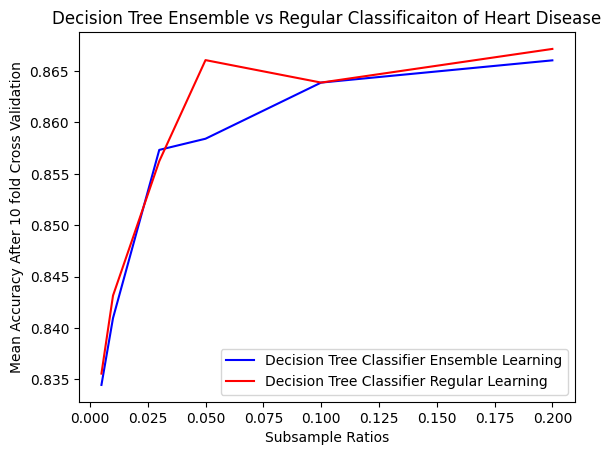

In [41]:
# Naive Bayes
import matplotlib.pyplot as plt

plt.plot(subsampleratios,dte,color='Blue',label='Decision Tree Classifier Ensemble Learning')
plt.plot(subsampleratios,dt,color='Red',label='Decision Tree Classifier Regular Learning')

# Add labels and a legend
plt.xlabel('Subsample Ratios')
plt.ylabel('Mean Accuracy After 10 fold Cross Validation')
plt.title('Decision Tree Ensemble vs Regular Classificaiton of Heart Disease')
plt.legend()


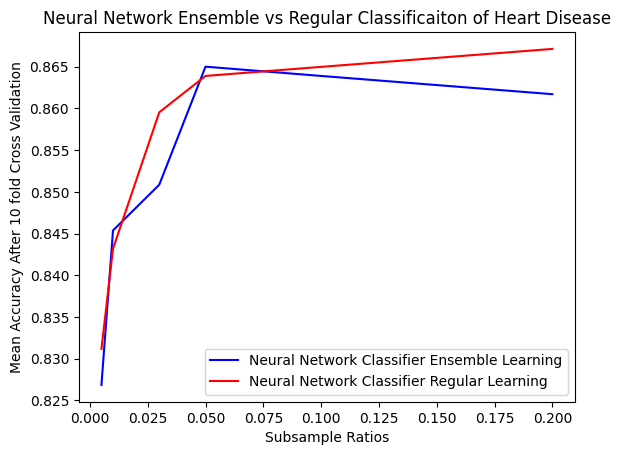

In [42]:
# Neural Network
import matplotlib.pyplot as plt

plt.plot(subsampleratios,nne,color='Blue',label='Neural Network Classifier Ensemble Learning')
plt.plot(subsampleratios,nn,color='Red',label='Neural Network Classifier Regular Learning')

# Add labels and a legend
plt.xlabel('Subsample Ratios')
plt.ylabel('Mean Accuracy After 10 fold Cross Validation')
plt.title('Neural Network Ensemble vs Regular Classificaiton of Heart Disease')
plt.legend()


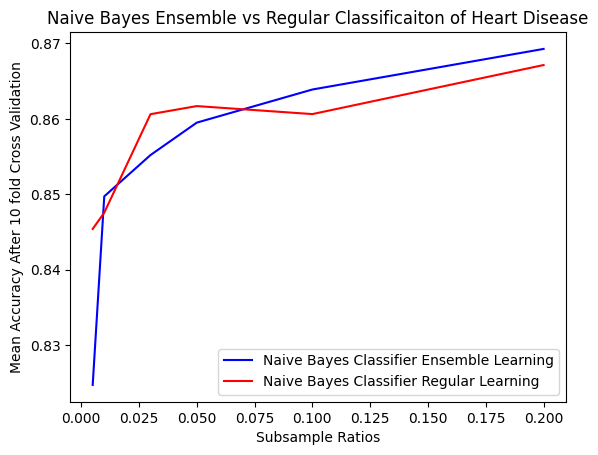

In [43]:
# Naive Bayes
import matplotlib.pyplot as plt

plt.plot(subsampleratios,nbe,color='Blue',label='Naive Bayes Classifier Ensemble Learning')
plt.plot(subsampleratios,nb,color='Red',label='Naive Bayes Classifier Regular Learning')

# Add labels and a legend
plt.xlabel('Subsample Ratios')
plt.ylabel('Mean Accuracy After 10 fold Cross Validation')
plt.title('Naive Bayes Ensemble vs Regular Classificaiton of Heart Disease')
plt.legend()


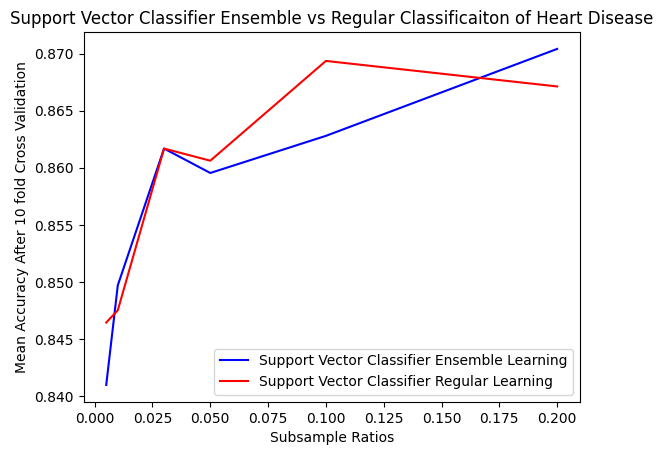

In [44]:
# Naive Bayes
import matplotlib.pyplot as plt

plt.plot(subsampleratios,svce,color='Blue',label='Support Vector Classifier Ensemble Learning')
plt.plot(subsampleratios,svc,color='Red',label='Support Vector Classifier Regular Learning')

# Add labels and a legend
plt.xlabel('Subsample Ratios')
plt.ylabel('Mean Accuracy After 10 fold Cross Validation')
plt.title('Support Vector Classifier Ensemble vs Regular Classificaiton of Heart Disease')
plt.legend()


**Report Your detailed observations**:

Based on the four graphs showing the performance of the regular vs ensemble classifier across the different subsample ratios, it is clear that there is variation in terms of classifier performance. First, each curve consistenly showed better perofrmance as the subsample ratio increased. This is mostly due to the fact that more data is used for training each weak classifier. Secondly, Naive Bayes classifier, decision trees, and support vector classifiers all show an increase in performance while using ensmeble learning, while a neural network is shown to not benefit from this strategy. To expand on this, both curves were relatively similar in terms of structure, signaling that ensemble learning did not provide any added functionality in terms of learning. This is most likely due to the fact that weak classifier perceptron was already not powerful and the voting scheme aggregated the majority of votes for each weak classifier. Typically, neural networks employ connected layers to gain deeper and more meaningful representaitons of the data, and all the ensemble learning did in this case was aggregate the results of several weak learners, resulting in an effective use of ensemble learning. On the other hand, however, decision trees did show a jump in performance up until a certain subsample ratio. Since decision trees use ensemble methods to form a random forest, this makes sense, since we are using a bagging approach. Support vector classifiers also had an increase in performance, possibly due to the fact that several decision boundaries based on the weak learners were aggregated for a majority, as opposed to one from the single weak learner. This was shown after a subsample ratio was increased past 0.2, singaling that the size of the decision boundary increased. Similarly, the circular decision boundary of naive bayes was similarly aggregated over a greater area as the subsample ratio increased past 0.05 for the Naive Bayes ensemble method. If all methods used boosting techniques, it is possible that performance could be used increased even more, since the errors made are corrected sequentially.